# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [131]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from matplotlib import figure


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# cities

['half moon bay',
 'rocha',
 'dauphin',
 'rikitea',
 'esik',
 'arlit',
 'busselton',
 'rudnichnyy',
 'karaul',
 'barrow',
 'taolanaro',
 'stephenville',
 'hithadhoo',
 'broome',
 'barentsburg',
 'iqaluit',
 'talnakh',
 'bilibino',
 'bengkulu',
 'herat',
 'dhidhdhoo',
 'bubaque',
 'luderitz',
 'illoqqortoormiut',
 'yanchukan',
 'mataura',
 'gorin',
 'arraial do cabo',
 'berlevag',
 'mar del plata',
 'hermanus',
 'puerto escondido',
 'cabo san lucas',
 'jamestown',
 'quatre cocos',
 'axim',
 'cidreira',
 'coquimbo',
 'vaini',
 'cayenne',
 'meulaboh',
 'havre-saint-pierre',
 'sokolo',
 'binga',
 'tuktoyaktuk',
 'albany',
 'montepuez',
 'new norfolk',
 'yilan',
 'huarmey',
 'hilo',
 'denpasar',
 'constitucion',
 'rawson',
 'port alfred',
 'nikolskoye',
 'thisted',
 'port elizabeth',
 'puerto ayora',
 'airai',
 'orumiyeh',
 'sakaiminato',
 'alofi',
 'coos bay',
 'saint-philippe',
 'yellowknife',
 'filingue',
 'saint-pierre',
 'darhan',
 'ushuaia',
 'bredasdorp',
 'egvekinot',
 'wanning',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# Create a Dataframe for city info
weather_df = pd.DataFrame({"City":cities})
weather_df['Max Temp (F)'] = ''
weather_df['Humidity (%)'] = ''
weather_df['Cloudiness (%)'] = ''
weather_df['Wind Speed (mph)'] = ''
weather_df['Latitude'] = ''
weather_df['Longitude'] = ''
weather_df['Country'] = ''

# Set variables / lists
url = "https://api.openweathermap.org/data/2.5/weather?q="
api_key = "&appid=" + weather_api_key
measure = '&units=imperial'

city_list = []
max_t = []
humid = []
cloud = []
wind = []
lat = []
lng = []
country = []

row = 1

# for loop for all city data
for city in cities:
    print(f'Processing Record {row}, the city of {city}')
    query_url = f'{url}{city}{api_key}{measure}'
    row += 1
    
    try:
        # extra ct the results from the api and add to lists
        response = requests.get(query_url).json()
        city_list.append(response['name'])
        max_t.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
    
    except:
        print("City not found. Skipping...")


Processing Record 1, the city of half moon bay
Processing Record 2, the city of rocha
Processing Record 3, the city of dauphin
Processing Record 4, the city of rikitea
Processing Record 5, the city of esik
Processing Record 6, the city of arlit
Processing Record 7, the city of busselton
Processing Record 8, the city of rudnichnyy
Processing Record 9, the city of karaul
City not found. Skipping...
Processing Record 10, the city of barrow
Processing Record 11, the city of taolanaro
City not found. Skipping...
Processing Record 12, the city of stephenville
Processing Record 13, the city of hithadhoo
Processing Record 14, the city of broome
Processing Record 15, the city of barentsburg
City not found. Skipping...
Processing Record 16, the city of iqaluit
Processing Record 17, the city of talnakh
Processing Record 18, the city of bilibino
Processing Record 19, the city of bengkulu
Processing Record 20, the city of herat
Processing Record 21, the city of dhidhdhoo
Processing Record 22, the c

Processing Record 178, the city of ust-kuyga
Processing Record 179, the city of ust-tsilma
Processing Record 180, the city of champasak
Processing Record 181, the city of ahuimanu
Processing Record 182, the city of esperance
Processing Record 183, the city of hailin
Processing Record 184, the city of ust-omchug
Processing Record 185, the city of omboue
Processing Record 186, the city of fatikchhari
City not found. Skipping...
Processing Record 187, the city of aflu
City not found. Skipping...
Processing Record 188, the city of male
Processing Record 189, the city of chagda
City not found. Skipping...
Processing Record 190, the city of makakilo city
Processing Record 191, the city of pevek
Processing Record 192, the city of ruteng
Processing Record 193, the city of bathsheba
Processing Record 194, the city of umm lajj
Processing Record 195, the city of shelburne
Processing Record 196, the city of lima
Processing Record 197, the city of komyshany
Processing Record 198, the city of bisira

Processing Record 358, the city of bonavista
Processing Record 359, the city of ajdabiya
Processing Record 360, the city of saint-louis
Processing Record 361, the city of bondo
Processing Record 362, the city of fukue
Processing Record 363, the city of avera
Processing Record 364, the city of maria aurora
Processing Record 365, the city of coahuayana
Processing Record 366, the city of sayyan
Processing Record 367, the city of vardo
Processing Record 368, the city of avelgem
Processing Record 369, the city of belaya gora
Processing Record 370, the city of ibotirama
Processing Record 371, the city of kameno
Processing Record 372, the city of port hardy
Processing Record 373, the city of dingle
Processing Record 374, the city of villa rica
Processing Record 375, the city of attawapiskat
City not found. Skipping...
Processing Record 376, the city of gallup
Processing Record 377, the city of wamba
Processing Record 378, the city of vanimo
Processing Record 379, the city of olafsvik
Processi

City not found. Skipping...
Processing Record 534, the city of bolshiye chapurniki
City not found. Skipping...
Processing Record 535, the city of mahina
Processing Record 536, the city of camocim
Processing Record 537, the city of ouidah
Processing Record 538, the city of paracuru
Processing Record 539, the city of wiang sa
Processing Record 540, the city of ahmadpur east
Processing Record 541, the city of pandan
Processing Record 542, the city of canutama
Processing Record 543, the city of bojnice
Processing Record 544, the city of pangnirtung
Processing Record 545, the city of sao joao da barra
Processing Record 546, the city of souillac
Processing Record 547, the city of monrovia
Processing Record 548, the city of shyryayeve
Processing Record 549, the city of aklavik
Processing Record 550, the city of bosaso
Processing Record 551, the city of saint anthony
Processing Record 552, the city of london
Processing Record 553, the city of port lincoln
Processing Record 554, the city of mal

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
# merge all lists into a data frame
weather_df = pd.DataFrame({'City':city_list, 'Max Temp (F)':max_t,
                          'Humidity (%)':humid, 'Cloudiness (%)':cloud,
                          'Wind Speed (mph)':wind, 'Lat':lat,
                          'Lng':lng, 'Country':country})

# create csv and display
weather_df.to_csv('output_data/weather.csv')
weather_df


,City,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Lat,Lng,Country
0,Half Moon Bay,61.00,71,1,8.05,37.4636,-122.4286,US
1,Rocha,63.48,94,3,4.12,-34.4833,-54.3333,UY
2,Dauphin,-22.00,63,1,12.66,51.1494,-100.0502,CA
3,Rikitea,78.78,69,73,10.56,-23.1203,-134.9692,PF
4,Esik,37.40,70,90,8.95,43.3552,77.4525,KZ
...,...,...,...,...,...,...,...,...
568,Conde,78.80,83,20,4.61,-7.2597,-34.9075,BR
569,Libertador General San Martín,73.96,65,20,3.18,-23.8064,-64.7876,AR
570,Lewistown,28.99,58,1,2.04,40.5992,-77.5714,US
571,Batagay-Alyta,-23.49,84,100,1.92,67.8006,130.4114,RU


In [27]:
weather_df.describe()

,Max Temp (F),Humidity,Cloudiness,Wind Speed (mph),Lat,Lng
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,48.561204,75.467714,51.776614,8.283264,20.860007,17.437073
std,32.648469,17.677207,41.119972,6.024226,32.850185,89.718885
min,-42.000000,1.000000,0.000000,0.090000,-54.800000,-179.166700
25%,28.400000,66.000000,2.000000,3.600000,-6.981100,-59.136700
50%,59.860000,79.000000,56.000000,6.910000,23.783300,20.226300
75%,75.000000,88.000000,95.000000,11.500000,49.486700,100.354300
max,98.010000,100.000000,100.000000,34.520000,78.218600,179.316700


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [121]:
over_hundo = weather_df[weather_df['Humidity (%)']>100]
over_hundo['Humidity (%)'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Humidity (%), dtype: float64

In [17]:
#  Get the indices of cities that have humidity over 100%.
# N/A - No cities are over 100%

Int64Index([], dtype='int64')

In [80]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [36]:
clean_city_data = weather_df
clean_city_data


,City,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Lat,Lng,Country
0,Half Moon Bay,61.00,71,1,8.05,37.4636,-122.4286,US
1,Rocha,63.48,94,3,4.12,-34.4833,-54.3333,UY
2,Dauphin,-22.00,63,1,12.66,51.1494,-100.0502,CA
3,Rikitea,78.78,69,73,10.56,-23.1203,-134.9692,PF
4,Esik,37.40,70,90,8.95,43.3552,77.4525,KZ
...,...,...,...,...,...,...,...,...
568,Conde,78.80,83,20,4.61,-7.2597,-34.9075,BR
569,Libertador General San Martín,73.96,65,20,3.18,-23.8064,-64.7876,AR
570,Lewistown,28.99,58,1,2.04,40.5992,-77.5714,US
571,Batagay-Alyta,-23.49,84,100,1.92,67.8006,130.4114,RU


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

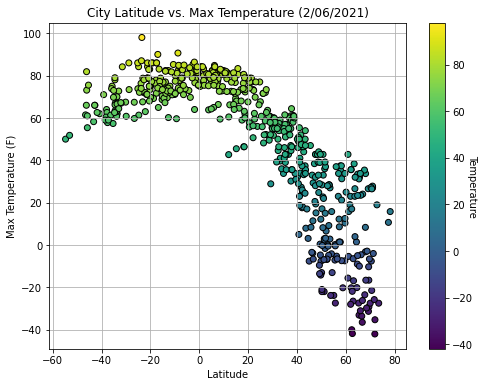

The scatter plot is measuring the Max Temperature of a Cities Latitude


In [183]:
plt.figure(figsize=(8,6))
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp (F)'],
           c=clean_city_data['Max Temp (F)'], edgecolors = 'black')

clb = plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (2/06/2021)')
clb.set_label('Temperature', rotation = 270)
plt.grid()
plt.savefig('output_data/latitude_vs_temp.png')
plt.show()
print(f'The scatter plot is measuring the Max Temperature of a Cities Latitude')

## Latitude vs. Humidity Plot

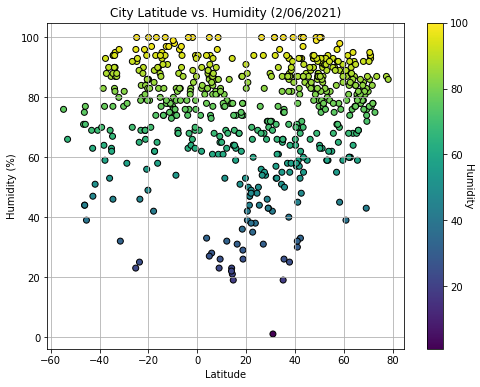

The scatter plot is measuring the Humidty of a Cities Latitude


In [185]:
plt.figure(figsize=(8,6))
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity (%)'],
           c=clean_city_data['Humidity (%)'], edgecolors = 'black')

clb = plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2/06/2021)')
clb.set_label('Humidity', rotation = 270)
plt.grid()
plt.savefig('output_data/latitude_vs_humidity.png')
plt.show()
# plt.savefig('output_data/latitude_vs_humidity.png')
print(f'The scatter plot is measuring the Humidty of a Cities Latitude')

## Latitude vs. Cloudiness Plot

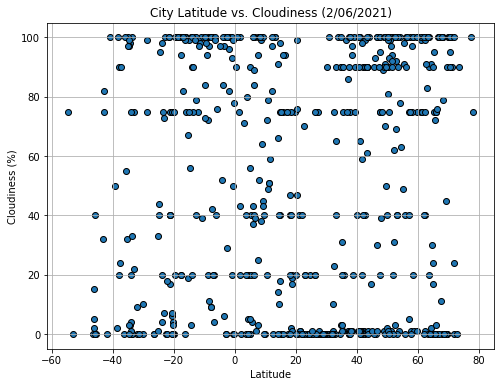

The scatter plot is measuring the Cloudiness level of a Cities Latitude


In [186]:
plt.figure(figsize=(8,6))
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness (%)'],
           edgecolors = 'black')

# clb = plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2/06/2021)')
# clb.set_label('Humidity', rotation = 270)
plt.grid()
plt.savefig('output_data/latitude_vs_cloudiness.png')
plt.show()
# plt.savefig('output_data/latitude_vs_cloudiness.png')
print(f'The scatter plot is measuring the Cloudiness level of a Cities Latitude')

## Latitude vs. Wind Speed Plot

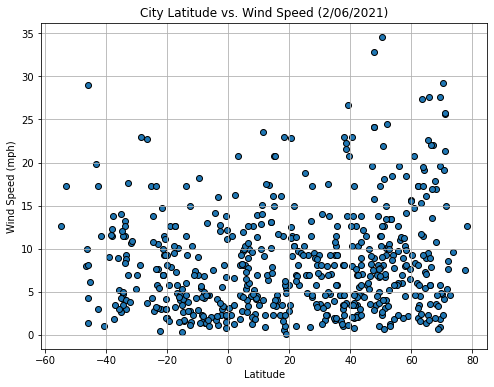

The scatter plot is measuring the Wind Speed of a Cities Latitude


In [187]:
plt.figure(figsize=(8,6))
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed (mph)'],
           edgecolors = 'black')

# clb = plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (2/06/2021)')
# clb.set_label('Humidity', rotation = 270)
plt.grid()
plt.savefig('output_data/latitude_vs_wind_speed.png')
plt.show()
# plt.savefig('output_data/latitude_vs_wind_speed.png')
print(f'The scatter plot is measuring the Wind Speed of a Cities Latitude')

## Linear Regression

In [130]:
nhem_df = clean_city_data[clean_city_data['Lat']>=0]
# nhem_df

shem_df = clean_city_data[clean_city_data['Lat']<0]
# shem_df

,City,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Lat,Lng,Country
1,Rocha,63.48,94,3,4.12,-34.4833,-54.3333,UY
3,Rikitea,78.78,69,73,10.56,-23.1203,-134.9692,PF
6,Busselton,62.01,95,100,3.00,-33.6500,115.3333,AU
10,Hithadhoo,81.36,76,0,12.19,-0.6000,73.0833,MV
15,Bengkulu,83.34,63,84,4.12,-3.8004,102.2655,ID
...,...,...,...,...,...,...,...,...
547,Karratha,82.89,56,7,11.07,-20.7377,116.8463,AU
556,Mareeba,90.00,74,82,5.75,-17.0000,145.4333,AU
558,Nampula,73.40,94,75,3.44,-15.1165,39.2666,MZ
568,Conde,78.80,83,20,4.61,-7.2597,-34.9075,BR


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

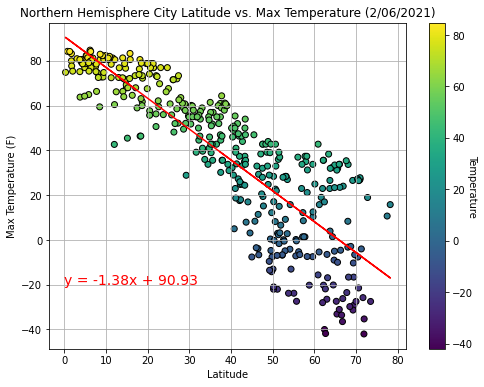

The scatter plot is measuring the Max Temperature of a Cities Latitude

in the Northern Hemisphere.  The r-value is: -0.8537383035309364

The closer you are to the equator the temperature will be lower on average


In [188]:
# set variables
x_val = (nhem_df['Lat'])
y_val = (nhem_df['Max Temp (F)'])

# scatterplot and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
regress_values = x_val * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(nhem_df['Lat'],nhem_df['Max Temp (F)'],
           c=nhem_df['Max Temp (F)'], edgecolors = 'black')

clb = plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere City Latitude vs. Max Temperature (2/06/2021)')
clb.set_label('Temperature', rotation = 270)
plt.plot(x_val,regress_values,'r-')
plt.annotate(line_eq,(0,-20),fontsize = 14, color='red')
plt.grid()
plt.savefig('output_data/northern_hemisphere_latitude_vs_temp.png')
plt.show()
# plt.savefig('output_data/northern_hemisphere_latitude_vs_temp.png')
print(f'The scatter plot is measuring the Max Temperature of a Cities Latitude\n')
print(f'in the Northern Hemisphere.  The r-value is: {rvalue}\n')
print(f'The closer you are to the equator the temperature will be lower on average')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

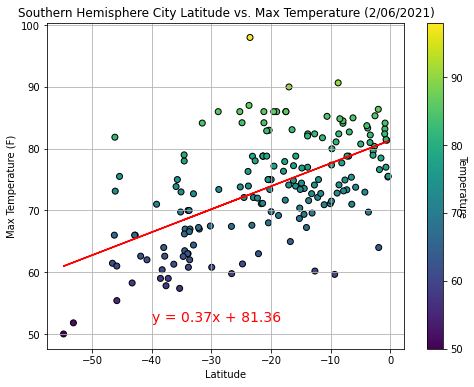

The scatter plot is measuring the Max Temperature of a Cities Latitude

in the Southern Hemisphere.  The r-value is: 0.573268025066229

The further you are from the equator the temperature will be lower on average


In [189]:
# set variables
x_val = (shem_df['Lat'])
y_val = (shem_df['Max Temp (F)'])

# scatterplot and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
regress_values = x_val * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(shem_df['Lat'],shem_df['Max Temp (F)'],
           c=shem_df['Max Temp (F)'], edgecolors = 'black')

clb = plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere City Latitude vs. Max Temperature (2/06/2021)')
clb.set_label('Temperature', rotation = 270)
plt.plot(x_val,regress_values,'r-')
plt.annotate(line_eq,(-40,52),fontsize = 14, color='red')
plt.grid()
plt.savefig('output_data/southern_hemisphere_latitude_vs_temp.png')
plt.show()
# plt.savefig('output_data/southern_hemisphere_latitude_vs_temp.png')
print(f'The scatter plot is measuring the Max Temperature of a Cities Latitude\n')
print(f'in the Southern Hemisphere.  The r-value is: {rvalue}\n')
print(f'The further you are from the equator the temperature will be lower on average')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

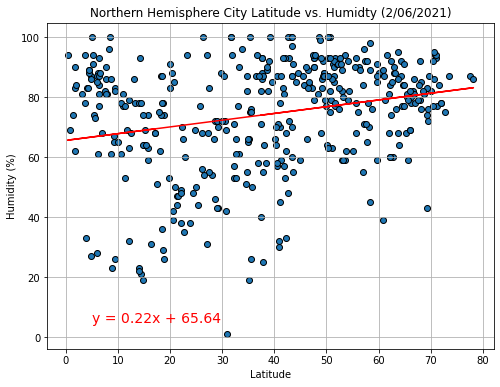

The scatter plot is measuring the Humidty percentage of a Cities Latitude

in the Northern Hemisphere.  The r-value is: 0.24956388484202566



In [190]:
# set variables
x_val = (nhem_df['Lat'])
y_val = (nhem_df['Humidity (%)'])

# scatterplot and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
regress_values = x_val * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(nhem_df['Lat'],nhem_df['Humidity (%)'], edgecolors = 'black')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere City Latitude vs. Humidty (2/06/2021)')
plt.plot(x_val,regress_values,'r-')
plt.annotate(line_eq,(5,5),fontsize = 14, color='red')
plt.grid()
plt.savefig('output_data/northern_hemisphere_humidity_vs_temp.png')
plt.show()
# plt.savefig('output_data/northern_hemisphere_humidity_vs_temp.png')
print(f'The scatter plot is measuring the Humidty percentage of a Cities Latitude\n')
print(f'in the Northern Hemisphere.  The r-value is: {rvalue}\n')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

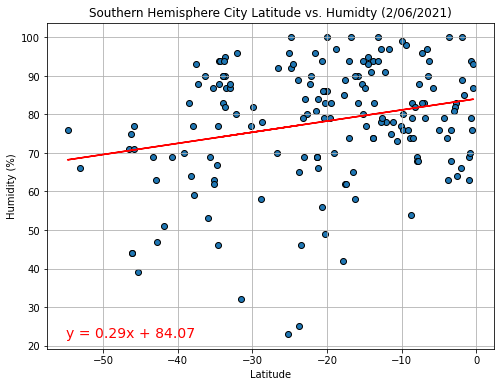

The scatter plot is measuring the Humidty percentage of a Cities Latitude

in the Southern Hemisphere.  The r-value is: 0.24902029752960234



In [191]:
# set variables
x_val = (shem_df['Lat'])
y_val = (shem_df['Humidity (%)'])

# scatterplot and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
regress_values = x_val * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(shem_df['Lat'],shem_df['Humidity (%)'], edgecolors = 'black')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere City Latitude vs. Humidty (2/06/2021)')
plt.plot(x_val,regress_values,'r-')
plt.annotate(line_eq,(-55,22),fontsize = 14, color='red')
plt.grid()
plt.savefig('output_data/southern_hemisphere_humidity_vs_temp.png')
plt.show()
# plt.savefig('output_data/southern_hemisphere_humidity_vs_temp.png')
print(f'The scatter plot is measuring the Humidty percentage of a Cities Latitude\n')
print(f'in the Southern Hemisphere.  The r-value is: {rvalue}\n')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

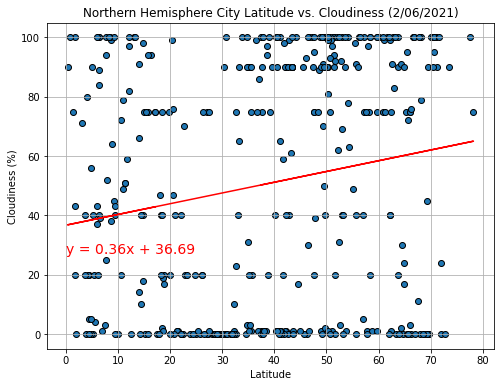

The scatter plot is measuring the Cloudiness percentage of a Cities Latitude

in the Northern Hemisphere.  The r-value is: 0.1806426727619922



In [192]:
# set variables
x_val = (nhem_df['Lat'])
y_val = (nhem_df['Cloudiness (%)'])

# scatterplot and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
regress_values = x_val * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(nhem_df['Lat'],nhem_df['Cloudiness (%)'],
           edgecolors = 'black')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere City Latitude vs. Cloudiness (2/06/2021)')
plt.plot(x_val,regress_values,'r-')
plt.annotate(line_eq,(0,27),fontsize = 14, color='red')
plt.grid()
plt.savefig('output_data/northern_hemisphere_latitude_vs_cloudiness.png')
plt.show()
# plt.savefig('output_data/northern_hemisphere_latitude_vs_cloudiness.png')
print(f'The scatter plot is measuring the Cloudiness percentage of a Cities Latitude\n')
print(f'in the Northern Hemisphere.  The r-value is: {rvalue}\n')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

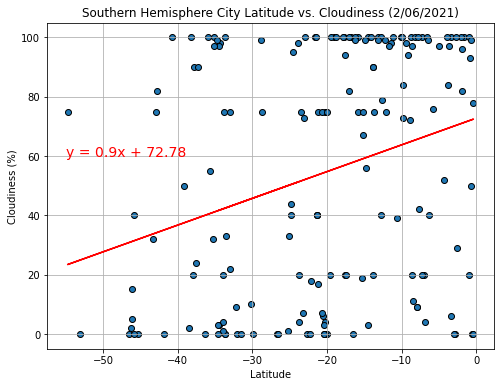

The scatter plot is measuring the Cloudiness percentage of a Cities Latitude

in the Southern Hemisphere.  The r-value is: 0.28924579197262423



In [193]:
# set variables
x_val = (shem_df['Lat'])
y_val = (shem_df['Cloudiness (%)'])

# scatterplot and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
regress_values = x_val * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(shem_df['Lat'],shem_df['Cloudiness (%)'],
           edgecolors = 'black')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere City Latitude vs. Cloudiness (2/06/2021)')
plt.plot(x_val,regress_values,'r-')
plt.annotate(line_eq,(-55,60),fontsize = 14, color='red')
plt.grid()
plt.savefig('output_data/southern_hemisphere_latitude_vs_cloudiness.png')
plt.show()
# plt.savefig('output_data/southern_hemisphere_latitude_vs_cloudiness.png')
print(f'The scatter plot is measuring the Cloudiness percentage of a Cities Latitude\n')
print(f'in the Southern Hemisphere.  The r-value is: {rvalue}\n')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

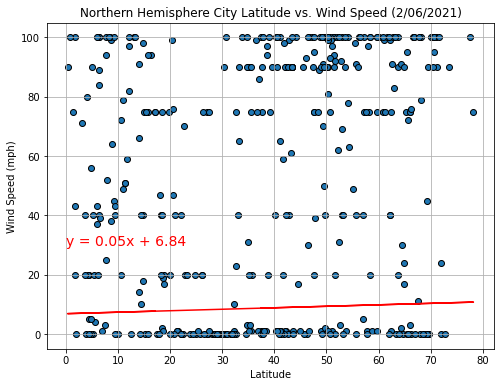

The scatter plot is measuring the Wind Speed of a Cities Latitude

in the Northern Hemisphere.  The r-value is: 0.1626131222278444


In [194]:
# set variables
x_val = (nhem_df['Lat'])
y_val = (nhem_df['Wind Speed (mph)'])

# scatterplot and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
regress_values = x_val * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(nhem_df['Lat'],nhem_df['Cloudiness (%)'],
           edgecolors = 'black')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere City Latitude vs. Wind Speed (2/06/2021)')
plt.plot(x_val,regress_values,'r-')
plt.annotate(line_eq,(0,30),fontsize = 14, color='red')
plt.grid()
plt.savefig('output_data/northern_hemisphere_latitude_vs_wind_speed.png')
plt.show()
# plt.savefig('output_data/northern_hemisphere_latitude_vs_wind_speed.png')
print(f'The scatter plot is measuring the Wind Speed of a Cities Latitude\n')
print(f'in the Northern Hemisphere.  The r-value is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

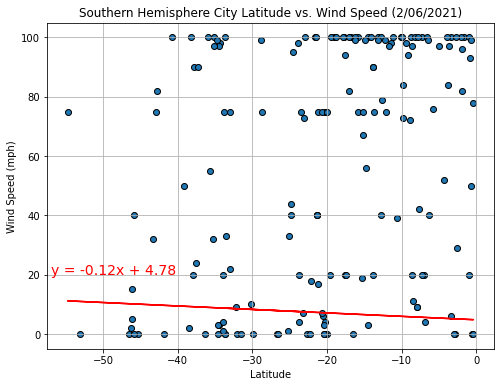

The scatter plot is measuring the Wind Speed of a Cities Latitude

in the Southern Hemisphere.  The r-value is: -0.29658103867351127


In [195]:
# set variables
x_val = (shem_df['Lat'])
y_val = (shem_df['Wind Speed (mph)'])

# scatterplot and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
regress_values = x_val * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.figure(figsize=(8,6))
plt.scatter(shem_df['Lat'],shem_df['Cloudiness (%)'],
           edgecolors = 'black')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere City Latitude vs. Wind Speed (2/06/2021)')
plt.plot(x_val,regress_values,'r-')
plt.annotate(line_eq,(-57,20),fontsize = 14, color='red')
plt.grid()
plt.savefig('output_data/southern_hemisphere_latitude_vs_wind_speed.png')
plt.show()
# plt.savefig('output_data/northern_hemisphere_latitude_vs_wind_speed.png')
print(f'The scatter plot is measuring the Wind Speed of a Cities Latitude\n')
print(f'in the Southern Hemisphere.  The r-value is: {rvalue}')